<a href="https://colab.research.google.com/github/bxck75/A1_Colabs/blob/master/FastAI_WGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Helpers Loading
from pathlib import Path
lib_file=Path('/content/lib/Helpers.py')
if not lib_file.is_file():
    import os
    os.system('mkdir -p /content/lib')
    os.chdir('/content/lib')
    os.system('wget https://raw.githubusercontent.com/bxck75/A1_Colabs/master/Helpers.py')
    os.system('wget https://raw.githubusercontent.com/bxck75/A1_Colabs/master/myrepcol.py')
    os.chdir('/content/')
# import inspect
from lib.Helpers import Helpers
from lib.myrepcol import reps
# regular imports
from fastai.vision import *
from fastai.vision.gan import *
import seaborn as sns
import numpy as np
import pandas as pd
import fastai
# Init helpers
H=Helpers()
#  remove sample_data
H.Me(['cml','rm -r /content/sample_data'])

def get_gdrive_dataset(pack):
    import google
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    os.chdir('/content/drive/My Drive')
    H.Me(['mkd',['dataset','models/pokemon'],'/content/'])
    H.Me(['cml','cp -r '+pack+' /content/dataset/'])
    os.chdir('/content/dataset')
    H.Me(['cml','unzip -q '+pack])
    H.Me(['cml','rm -r '+pack])
    os.chdir('/content')


def MethHelp(libs):
    os_help=H.Me(['vdir',libs])
    #make a list containing libs values of os_help
    listOfLibs = [x[0] for x in os_help]
    #make a list containing libs method values of os_help
    listOfMethods= [x[1] for x in os_help]
    # Create a zipped list of tuples from above lists
    zippedList =  list(zip(listOfLibs, listOfMethods[0:5]))
    zippedList
    # request help on method from list
    return zippedList

# MethHelp([
# #         Helpers,
# #           fastai,
# #           fastai.basics,
#           fastai.basic_train,
#          ])
#
# H.Me(['get_args',fastai.basic_train.progress_bar])

[Running-->]['cml', 'rm -r /content/sample_data']


In [0]:
# method_list=MethHelp([
# #         Helpers,
# #           fastai,
# #           fastai.basics,
#           fastai.basic_train,
#           GANItemList.process,
#          ])
# print(method_list[1])

In [0]:
# H.Me(['get_args',learn.gan_trainer.switch])

In [5]:
H.dataset_name1='garbagepailkids'
# H.dataset_name2='kaggle-one-shot-pokemon'

get_gdrive_dataset(H.dataset_name1+'.zip')
# get_gdrive_dataset(H.dataset_name2+'.zip')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
[Running-->]['mkd', ['dataset', 'models/pokemon'], '/content/']
[Running-->]['cml', 'cp -r garbagepailkids.zip /content/dataset/']
[Running-->]['cml', 'unzip -q garbagepailkids.zip']
[Running-->]['cml', 'rm -r garbagepailkids.zip']


In [6]:
garbagepailkids_path=Path("/content/dataset/" + H.dataset_name1)
print(garbagepailkids_path)

pokemon_type='/pokemon-a'
pokemon_path = Path("/content/pokemon_dataset/" + H.dataset_name1 + pokemon_type)
print(pokemon_path)



/content/dataset/garbagepailkids
/content/pokemon_dataset/garbagepailkids/pokemon-a


In [0]:
# tfms = get_transforms(flip_vert = False)

In [0]:
def get_data(bs, size, path):
    return (GANItemList.from_folder(path, noise_sz=100)
               .split_none()
               .label_from_func(noop)
#                .transform(tfms=None, size=size, tfm_y=True)
               .transform(tfms=[[crop_pad(size=size, row_pct=(0,1), col_pct=(0,1))], []], size=size, tfm_y=True)
               .databunch(bs=bs)
               .normalize(stats = [torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])], do_x=False, do_y=True))

In [0]:
data = get_data(50, 128, garbagepailkids_path)


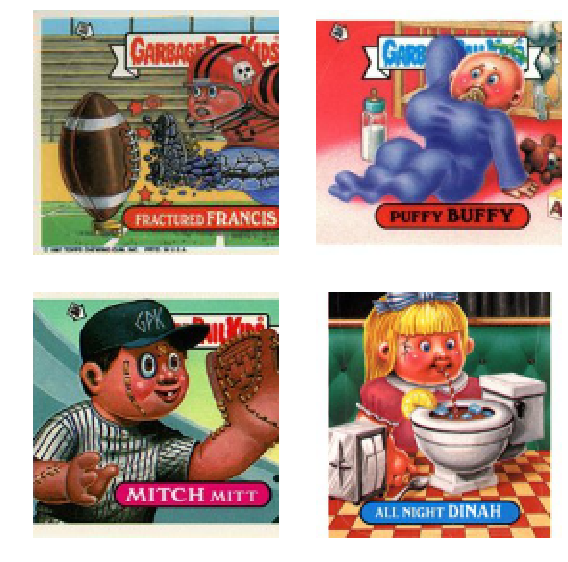

In [10]:
data.show_batch(rows=2)

In [0]:
generator      = basic_generator(in_size=128, n_channels=3, n_extra_layers=1)
discriminator  = basic_critic   (in_size=128, n_channels=3, n_extra_layers=1)

In [0]:
learn = GANLearner.wgan(data, generator, discriminator, switch_eval=False,
                        opt_func = partial(optim.Adam, betas = (0.,0.99)), wd=0., model_dir='/content/models')

In [0]:
# MethHelp([GANItemList])

In [0]:
# Note: After epoch 1000 started training with LR of 2e-2
# H.Me(['mkd',[H.dataset_name)],'/content/models'])
# os.chdir('/content/models/'+path=Path("/content/dataset/" + H.dataset_name))


# H.Me(['cml','wget https://www.dropbox.com/s/xcdzb7e41620qu1/64pokemon_1200epoch.pth'])
# H.pokemon_pretrained_model='/content/models/pokemon/64pokemon_1200epoch'
# learn.load(H.pokemon_pretrained_model)


In [0]:
# learn.lr_find(stop_div=False, num_it=200)
# learn.recorder.plot(suggestion=True)

# LR finder produced a result of 
# Min numerical gradient: 9.12E-04
# Min loss divided by 10: 4.37E-04

# https://i.imgur.com/rBRCqjW.png
# https://i.imgur.com/8rs6xem.png

In [0]:
#Library discovering
# MethHelp([
# #             fastai,
# #             fastai.basics,
# #             fastai.basics.progress_bar,
#             GANLearner,
#          ])

In [0]:
# method discovering
# meth=fastai.basics.progress_bar.update_every
# meth=learn.fit
# method_args=H.Me(['get_args',meth])
# print(method_args)

0.000912


epoch,train_loss,valid_loss,gen_loss,disc_loss,time
0,-0.359317,#na#,0.519449,-0.549799,00:17
1,-0.439013,#na#,0.101700,-0.536130,00:17
2,-0.496907,#na#,0.388568,-0.692898,00:17
3,-0.634200,#na#,0.527781,-0.887283,00:18
4,-0.734125,#na#,0.592455,-1.020647,00:18
5,-0.593599,#na#,0.571952,-0.862207,00:18
6,-0.544158,#na#,0.472162,-0.755040,00:18
7,-0.590886,#na#,0.469370,-0.798267,00:18
8,-0.894825,#na#,0.540949,-1.162646,00:18
9,-0.903000,#na#,0.491553,-1.162606,00:19


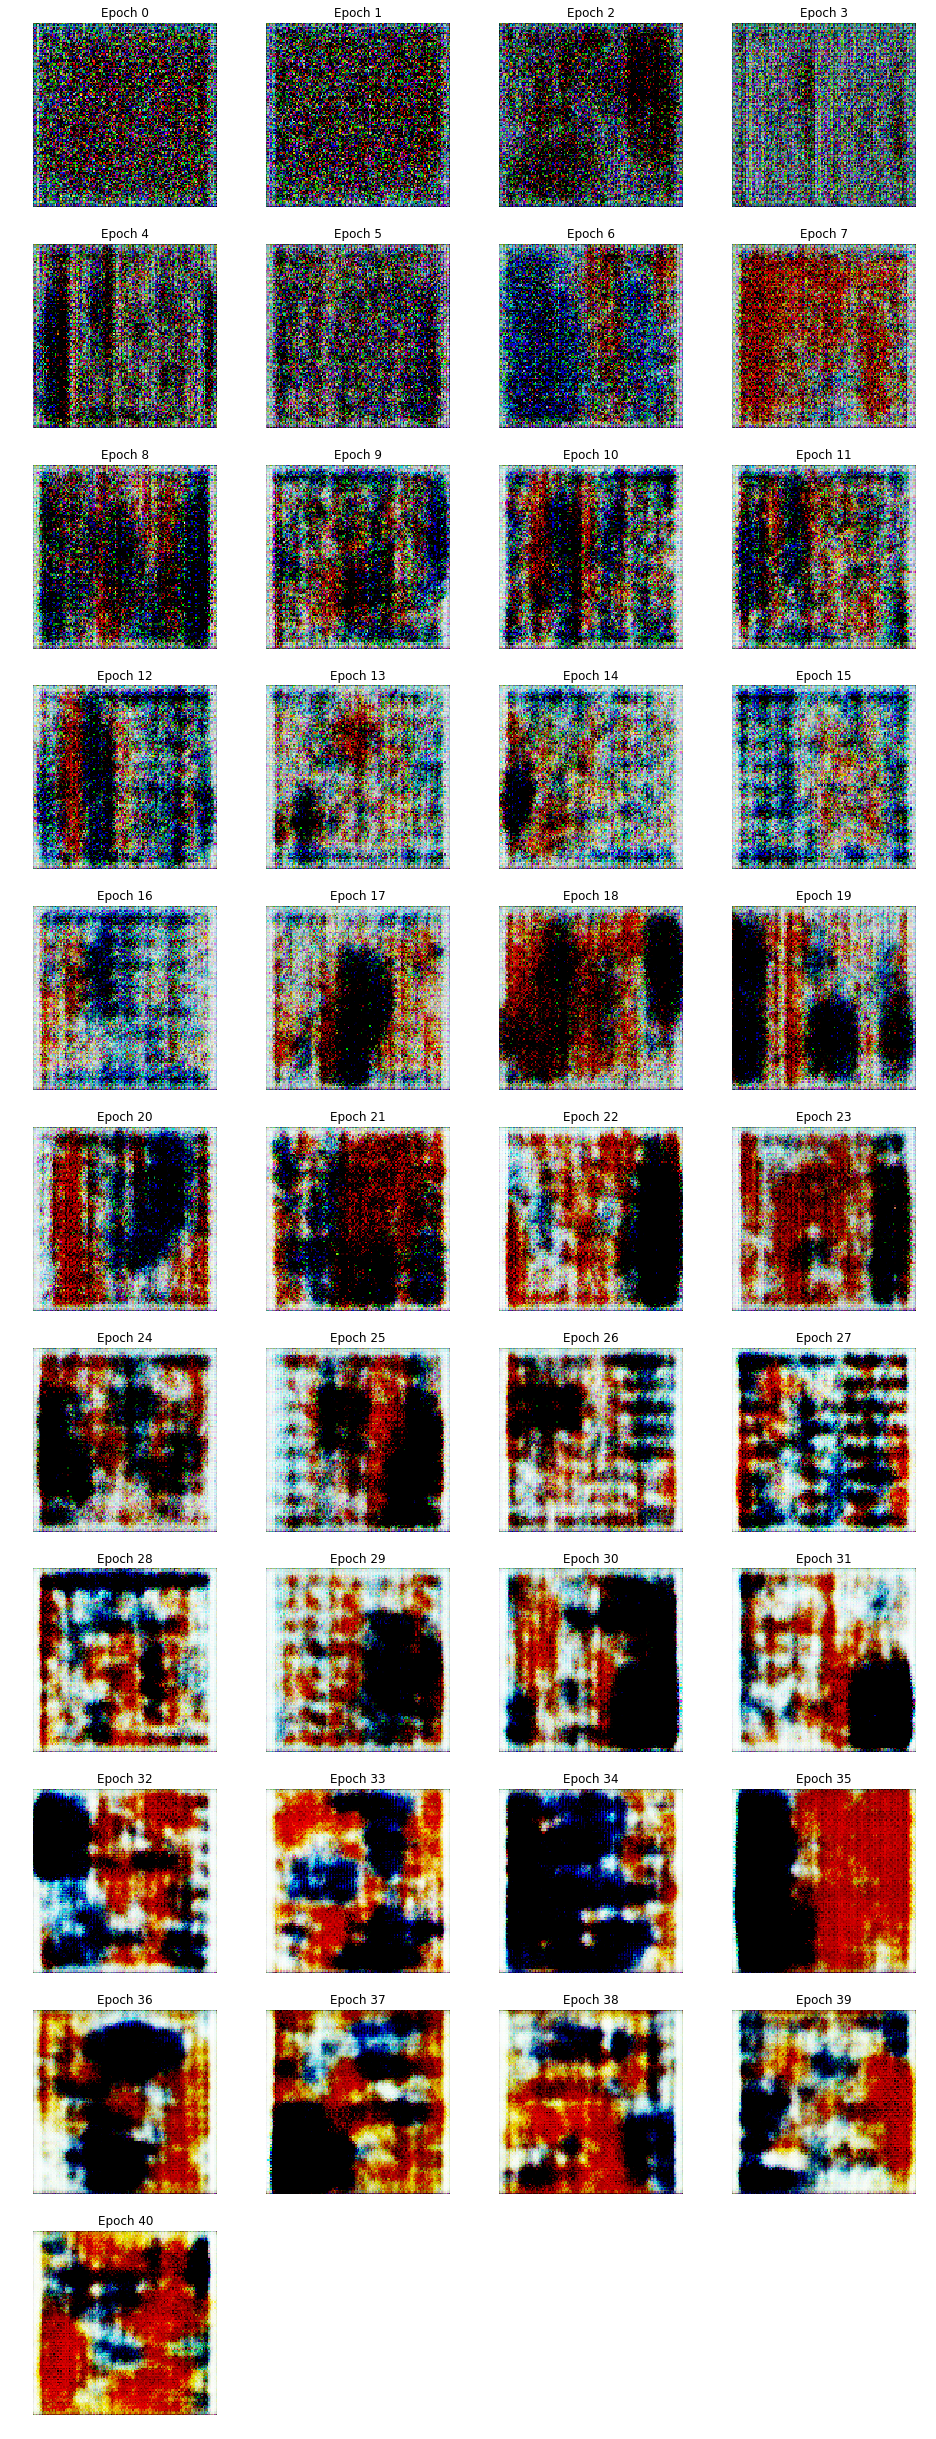

In [0]:
epochs=100
learn_rate=9.12E-04
# learn_rate=2e-03
print(learn_rate)
learn.fit(epochs,learn_rate)

In [0]:
# learn.gan_trainer.switch(gen_mode=True)
learn.show_results(ds_type=DatasetType.Train, rows=2, columns=4, figsize=(20,4))

In [0]:
learn.save('/content/pokemon_dataset/64' + H.dataset_name + '_' + str(epochs) + '_epoch')